In [113]:
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

%matplotlib inline

In [141]:
#import data
df = pd.read_csv(r"..\data\appl_1h_500.csv", index_col=0)

In [143]:
df.sort_values(by="datetime", inplace=True)

In [144]:
# convert index to datatime
df.index = pd.to_datetime(df.index)
# df.index # run to confirm

#### GROUPBY DATATIME INDEX

<AxesSubplot:xlabel='datetime,datetime'>

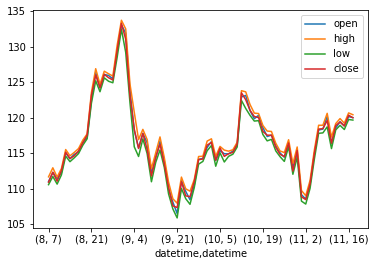

In [55]:
df.groupby(by=[df.index.month, df.index.day]).mean().loc[:,"open":"close"].plot()

In [145]:
df.head()

,open,high,low,close,volume
datetime,,,,,
2020-08-07 13:30:00,111.3000,111.71500,110.3100,110.5450,3082744
2020-08-07 14:30:00,110.5575,111.67750,110.3750,111.0700,3302817
2020-08-07 15:30:00,111.0950,111.58000,110.9775,111.1125,1429901
2020-08-10 09:30:00,112.5000,113.77500,111.6250,111.9100,9904385
2020-08-10 10:30:00,111.9150,112.36347,110.0700,111.4650,5419135


## SARIMAX Modeling?

<AxesSubplot:xlabel='datetime'>

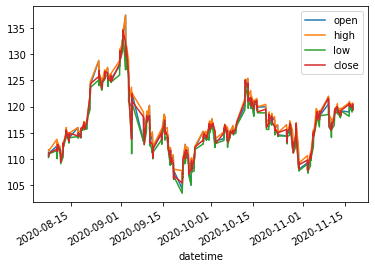

In [146]:
df.loc[:,"open":"close"].plot()

In [147]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [148]:
adfuller_test(df['open'])

ADF Test Statistic : -2.7117833685012127
p-value : 0.0720213330632842
#Lags Used : 6
Number of Observations Used : 493
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [149]:
data = df["open"]

In [150]:
model = ARIMA(data, order=(1,1,1))
model_fit = model.fit()

C:\Users\Yung\Anaconda3\envs\fitsnbits\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Yung\Anaconda3\envs\fitsnbits\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Yung\Anaconda3\envs\fitsnbits\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [151]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   open   No. Observations:                  500
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -819.898
Date:                Tue, 17 Nov 2020   AIC                           1645.796
Time:                        23:20:50   BIC                           1658.434
Sample:                             0   HQIC                          1650.755
                                - 500                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1111      0.214      0.519      0.604      -0.308       0.531
ma.L1         -0.2467      0.210     -1.175      0.240      -0.658       0.165
sigma2         1.5656      0.048     32.906      0.000       1.472       1.659
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1405.57
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.36   Skew:                            -0.72
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

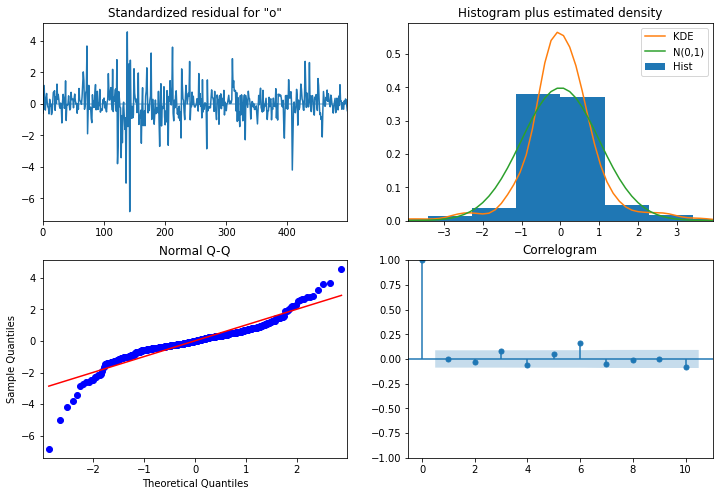

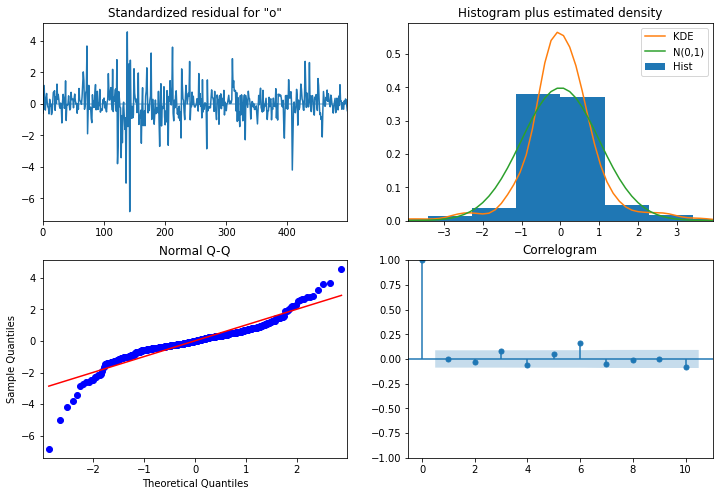

In [167]:
model_fit.plot_diagnostics(figsize=(12,8))

In [161]:
n = 100 
start = df.tail(n).index[0]
end = df.tail(n).index[-1]

In [162]:
df["forecast"] = model_fit.predict(start=start, end=end, dynamic=True)

<AxesSubplot:xlabel='datetime'>

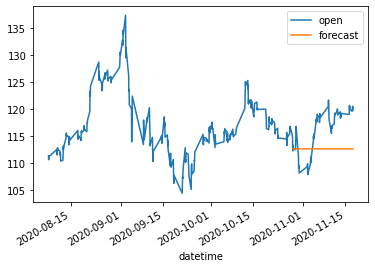

In [163]:
df[["open", "forecast"]].plot()

## NEXT IDEA

do a rolling prediction where the sarima only looks at data fit at X ranges

In [77]:
split_percent = 0.3
split_index = int((1-split_percent)*len(df.index))

In [78]:
train, test = df.iloc[:split_index,:], df.iloc[split_index:,:]

In [82]:
data = train["open"]

In [83]:
data.index

DatetimeIndex(['2020-11-17 15:30:00', '2020-11-17 14:30:00',
               '2020-11-17 13:30:00', '2020-11-17 12:30:00',
               '2020-11-17 11:30:00', '2020-11-17 10:30:00',
               '2020-11-17 09:30:00', '2020-11-16 15:30:00',
               '2020-11-16 14:30:00', '2020-11-16 13:30:00',
               ...
               '2020-09-10 11:30:00', '2020-09-10 10:30:00',
               '2020-09-10 09:30:00', '2020-09-09 15:30:00',
               '2020-09-09 14:30:00', '2020-09-09 13:30:00',
               '2020-09-09 12:30:00', '2020-09-09 11:30:00',
               '2020-09-09 10:30:00', '2020-09-09 09:30:00'],
              dtype='datetime64[ns]', name='datetime', length=350, freq=None)

In [84]:
model = ARIMA(data, order=(1,1,0))
model_fit = model.fit()
model_fit.summary()

C:\Users\Yung\Anaconda3\envs\fitsnbits\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Yung\Anaconda3\envs\fitsnbits\lib\site-packages\statsmodels\tsa\base\tsa_model.py:587: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
C:\Users\Yung\Anaconda3\envs\fitsnbits\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Yung\Anaconda3\envs\fitsnbits\lib\site-packages\statsmodels\tsa\base\tsa_model.py:587: ValueWarning: A date index has been provided, but it is not monotonic and so will be ig

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   open   No. Observations:                  350
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -521.273
Date:                Tue, 17 Nov 2020   AIC                           1046.547
Time:                        22:58:06   BIC                           1054.257
Sample:                             0   HQIC                          1049.616
                                - 350                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0280      0.044     -0.639      0.523      -0.114       0.058
sigma2         1.1611      0.053     22.106      0.000       1.058       1.264
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               191.76
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.63   Skew:                             0.05
Prob(H) (two-sided):                  0.01   Kurtosis:                         6.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [85]:
fore_cast = model_fit.forecast(steps=150)

C:\Users\Yung\Anaconda3\envs\fitsnbits\lib\site-packages\statsmodels\tsa\base\tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [93]:
test_open = test["open"].reset_index()

In [97]:
fore_cast = fore_cast.reset_index()

In [107]:
check_df = pd.concat([test_open, fore_cast], axis=1)

In [108]:
check_df = check_df.drop(columns="index")
check_df.index = check_df.datetime


In [109]:
check_df

,datetime,open,predicted_mean
datetime,,,
2020-09-08 15:30:00,2020-09-08 15:30:00,114.2700,117.203701
2020-09-08 14:30:00,2020-09-08 14:30:00,115.0100,117.203318
2020-09-08 13:30:00,2020-09-08 13:30:00,116.0800,117.203329
2020-09-08 12:30:00,2020-09-08 12:30:00,116.1100,117.203328
2020-09-08 11:30:00,2020-09-08 11:30:00,117.2600,117.203328
...,...,...,...
2020-08-10 10:30:00,2020-08-10 10:30:00,111.9150,117.203328
2020-08-10 09:30:00,2020-08-10 09:30:00,112.5000,117.203328
2020-08-07 15:30:00,2020-08-07 15:30:00,111.0950,117.203328


<AxesSubplot:xlabel='datetime'>

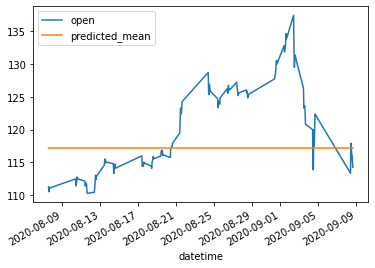

In [110]:
check_df[["open","predicted_mean"]].plot()

In [64]:
model2 = sm.tsa.SARIMAX(data, order=(1,0,0))

C:\Users\Yung\Anaconda3\envs\fitsnbits\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Yung\Anaconda3\envs\fitsnbits\lib\site-packages\statsmodels\tsa\base\tsa_model.py:587: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
C:\Users\Yung\Anaconda3\envs\fitsnbits\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Yung\Anaconda3\envs\fitsnbits\lib\site-packages\statsmodels\tsa\base\tsa_model.py:587: ValueWarning: A date index has been provided, but it is not monotonic and so will be ig